<a href="https://colab.research.google.com/github/shreyakabra/CODSOFT/blob/main/IrisFlowerClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Iris Flower Classification**

Author: Shreya Kabra<br>
Date: 5th November, 2023

## Project Goal
* Build a model that classify the Iris flowers into
their respective species.

In [8]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving IRIS.csv to IRIS (1).csv


{'IRIS (1).csv': b'sepal_length,sepal_width,petal_length,petal_width,species\r\n5.1,3.5,1.4,0.2,Iris-setosa\r\n4.9,3,1.4,0.2,Iris-setosa\r\n4.7,3.2,1.3,0.2,Iris-setosa\r\n4.6,3.1,1.5,0.2,Iris-setosa\r\n5,3.6,1.4,0.2,Iris-setosa\r\n5.4,3.9,1.7,0.4,Iris-setosa\r\n4.6,3.4,1.4,0.3,Iris-setosa\r\n5,3.4,1.5,0.2,Iris-setosa\r\n4.4,2.9,1.4,0.2,Iris-setosa\r\n4.9,3.1,1.5,0.1,Iris-setosa\r\n5.4,3.7,1.5,0.2,Iris-setosa\r\n4.8,3.4,1.6,0.2,Iris-setosa\r\n4.8,3,1.4,0.1,Iris-setosa\r\n4.3,3,1.1,0.1,Iris-setosa\r\n5.8,4,1.2,0.2,Iris-setosa\r\n5.7,4.4,1.5,0.4,Iris-setosa\r\n5.4,3.9,1.3,0.4,Iris-setosa\r\n5.1,3.5,1.4,0.3,Iris-setosa\r\n5.7,3.8,1.7,0.3,Iris-setosa\r\n5.1,3.8,1.5,0.3,Iris-setosa\r\n5.4,3.4,1.7,0.2,Iris-setosa\r\n5.1,3.7,1.5,0.4,Iris-setosa\r\n4.6,3.6,1,0.2,Iris-setosa\r\n5.1,3.3,1.7,0.5,Iris-setosa\r\n4.8,3.4,1.9,0.2,Iris-setosa\r\n5,3,1.6,0.2,Iris-setosa\r\n5,3.4,1.6,0.4,Iris-setosa\r\n5.2,3.5,1.5,0.2,Iris-setosa\r\n5.2,3.4,1.4,0.2,Iris-setosa\r\n4.7,3.2,1.6,0.2,Iris-setosa\r\n4.8,3.1,1.

In [9]:
#importing necessary libraries and loading the dataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
data=pd.read_csv("IRIS.csv", encoding='latin-1', engine='python')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
#describing the stats of the data
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
#checking for any null values
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
#checking for different species in the data and visualizing them
data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

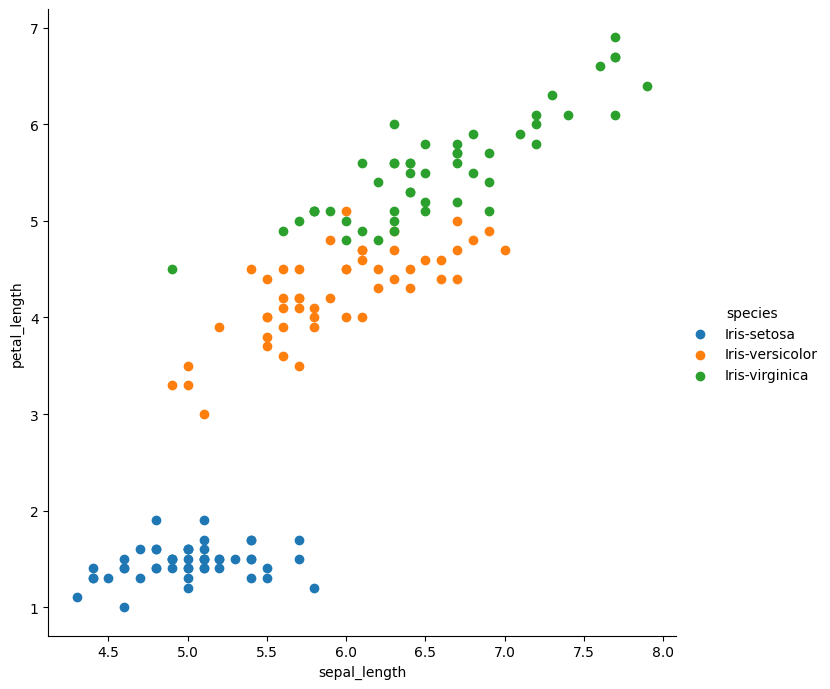

In [13]:
sns.FacetGrid(data, hue='species', height=7).map(plt.scatter,'sepal_length','petal_length').add_legend()

In [14]:
#fitting the model
from sklearn.linear_model import LogisticRegression
X=data[['sepal_length','petal_length','sepal_width','petal_width']].values
y=data[['species']].values
data_model=LogisticRegression()
data_model.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [15]:
#detemining the accuracy
data_model.score(X,y)


0.9733333333333334

In [16]:
#making predictions
y_pred=data_model.predict(X)

In [17]:
from sklearn import metrics
print(metrics.classification_report(y,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.98      0.94      0.96        50
 Iris-virginica       0.94      0.98      0.96        50

       accuracy                           0.97       150
      macro avg       0.97      0.97      0.97       150
   weighted avg       0.97      0.97      0.97       150



In [18]:
print(metrics.confusion_matrix(y,y_pred))

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


In [19]:
predicted=data_model.predict([[5.1,7,3,5]])
predicted

array(['Iris-virginica'], dtype=object)

#Conclusion
The model can successfully classify the and predict Iris Flower into it's respective species.